In [1]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm 

In [8]:
TRAIN_DIR = 'C:/Users/Isaac Sadikin/Desktop/AI/dogs/train'
TEST_DIR = 'C:/Users/Isaac Sadikin/Desktop/AI/dogs/test'
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')



In [9]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [10]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [11]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [12]:
train_data = create_train_data()
# If you have already created the dataset:
#train_data = np.load('train_data.npy')

100%|██████████| 25000/25000 [06:18<00:00, 66.07it/s] 


In [6]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

NameError: name 'os' is not defined

In [8]:
train = train_data[:-500]
test = train_data[-500:]

NameError: name 'train_data' is not defined

In [9]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

NameError: name 'np' is not defined

In [18]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

NameError: name 'model' is not defined

In [19]:
import tensorflow as tf
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

ModuleNotFoundError: No module named 'tensorflow'

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

import os
print(os.listdir("../input"))

# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
copyfile(src = "../input/view-class/view_helper.py", dst = "../working/view_helper.py")

# import all our functions
import view_helper as helper


ModuleNotFoundError: No module named 'torch'

In [ ]:
print(os.listdir("../input/dogs-vs-cats-for-pytorch/cat_dog_data/Cat_Dog_data"))

In [ ]:
data_dir = '../input/dogs-vs-cats-for-pytorch/cat_dog_data/Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [34]:
# change this to the trainloader or testloader 
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,10), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

NameError: name 'trainloader' is not defined

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

ModuleNotFoundError: No module named 'torch'

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

import os
print(os.listdir("../input"))

# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
copyfile(src = "../input/view-class/view_helper.py", dst = "../working/view_helper.py")

# import all our functions
import view_helper as helper

# Any results you write to the current directory are saved as output.

ModuleNotFoundError: No module named 'torch'

In [38]:
import os
import shutil
import re

base_dir = "PetImages/"

# Create training folder
files = os.listdir(base_dir)

# Moves all training cat images to cats folder, training dog images to dogs folder
def train_maker(name):
  train_dir = f"{base_dir}/train/{name}"
  for f in files:
        search_object = re.search(name, f)
        if search_object:
          shutil.move(f'{base_dir}/{name}', train_dir)

train_maker("Cat")
train_maker("Dog")

# Make the validation directories
try:
    os.makedirs("val/Cat")
    os.makedirs("val/Dog")
except OSError:
    print ("Creation of the directory %s failed")
else:
    print ("Successfully created the directory %s ")

# Create validation folder

cat_train = base_dir + "train/Cat/"
cat_val = base_dir + "val/Cat/"
dog_train = base_dir + "train/Dog/"
dog_val = base_dir + "val/Dog/"

cat_files = os.listdir(cat_train)
dog_files = os.listdir(dog_train)

# This will put 1000 images from the two training folders
# into their respective validation folders

for f in cat_files:
    validationCatsSearchObj = re.search("5\d\d\d", f)
    if validationCatsSearchObj:
        shutil.move(f'{cat_train}/{f}', cat_val)

for f in dog_files:
    validationCatsSearchObj = re.search("5\d\d\d", f)
    if validationCatsSearchObj:
        shutil.move(f'{dog_train}/{f}', dog_val)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'PetImages/'

In [39]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy



ModuleNotFoundError: No module named 'torch'

In [40]:
from torchvision import datasets, transforms
import torch

folder_path = "/Users/krshrimali/Documents/dataset/train/"
transform = transforms.Compose([transforms.CenterCrop(224), transforms.ToTensor())
data = datasets.ImageFolder(root = os.path.join(folder_path), transform = transform)

SyntaxError: invalid syntax (<ipython-input-40-0dd36f5be17a>, line 5)

In [43]:
# Imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

ModuleNotFoundError: No module named 'cv2'

In [20]:
import os
import cv2
import numpy as np
from tqdm import tqdm


class DogsVSCats():
    IMG_SIZE = 50
    CATS = "C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Cat"
    DOGS = "C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    
    

In [21]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Cat"
    DOGS = "C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        pass
                    except Exception as e:
                        pass
                        #print(label, f, str(e))

In [22]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Cat"
    DOGS = "C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])
                    except Exception as e:
                        pass
                        #print(label, f, str(e))

In [23]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Cat"
    DOGS = "C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Cat


100%|██████████| 12501/12501 [01:22<00:00, 152.02it/s]


C:/Users/Isaac Sadikin/Desktop/AI/dogcat/PetImages/Dog


100%|██████████| 12501/12501 [01:17<00:00, 160.36it/s]


Cats: 12476
Dogs: 12470


In [24]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [28]:
import torch

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])


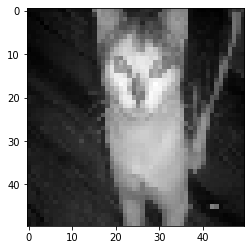

In [29]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")

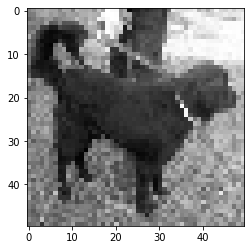

In [30]:
import matplotlib.pyplot as plt

plt.imshow(X[50], cmap="gray")